In [2]:
import pandas as pd            
import matplotlib.pyplot as plt  
import numpy as np #numerical operations and caluclations

import statsmodels.formula.api as smf

#Logistic Regression
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

import seaborn as sns
ax,figsize=(16,10)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [6]:
year18=pd.read_excel("https://www.foreignlaborcert.doleta.gov/pdf/PerformanceData/2018/PERM_Disclosure_Data_FY2018_Q4_EOY.xlsx")

In [7]:
year17=pd.read_excel("https://www.foreignlaborcert.doleta.gov/pdf/PerformanceData/2017/PERM_Disclosure_Data_FY17.xlsx")

In [8]:
year16=pd.read_excel("https://www.foreignlaborcert.doleta.gov/docs/Performance_Data/Disclosure/FY15-FY16/PERM_Disclosure_Data_FY16.xlsx")

** Cleaning Data **
* h1b18 = all 2018 h-1b, h-1b1, and e-3 applicants
* clean18 = applicants who finished their applications

## Objective 1
** Look specifically at the H-1B visa data and who was applying and who was accepted **

In [9]:
h1b_array=['H-1B','H-1B1','E-3']
#add binary response variable to h1b_array data 
#Certified - 1
#Denied - 0 
year18['Response']=np.where(year18['CASE_STATUS']!='Denied', int('1'), int('0'))

h1b18=year18.loc[year18['CLASS_OF_ADMISSION'].isin(h1b_array)]
clean18= h1b18.loc[h1b18["CASE_STATUS"]!="Withdrawn"]

country18 = clean18["COUNTRY_OF_CITIZENSHIP"]
state18 = clean18["EMPLOYER_STATE"]
industry18 = clean18["NAICS_US_TITLE"]
education18 = clean18["FOREIGN_WORKER_INFO_EDUCATION"]

In [233]:
clean18.shape

(77186, 126)

** 2018 ** 

** Finding out % Accepted and % Denied **

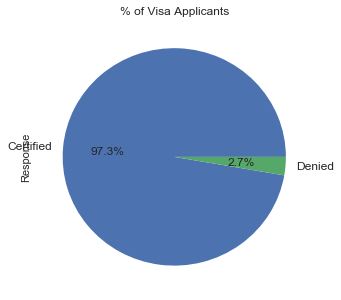

In [26]:
ax = (h1b18['Response'].value_counts()*100.0 /len(h1b18)).plot.pie(autopct='%.1f%%', labels = ['Certified','Denied'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_title('% of Visa Applicants', fontsize = 12)

** Looks at the most and least popular options for applicant country of citizenship (country18), state they're working in in the US (state18), and industry they work in (industry18) and the most popular levels of education (education18) **

INDIA          51674
CHINA           9553
CANADA          2016
SOUTH KOREA     1223
PHILIPPINES      751
Name: COUNTRY_OF_CITIZENSHIP, dtype: int64


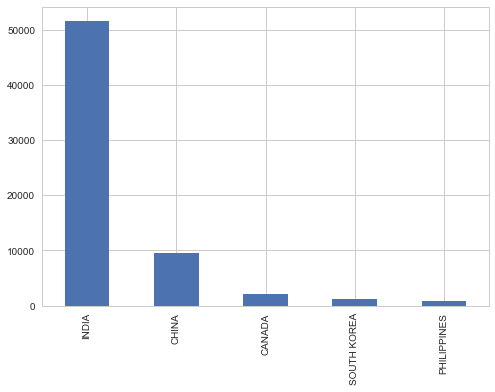

In [61]:
countryhead18 = country18.value_counts().head()
countryhead18.plot.bar()
print(countryhead18)

ANGOLA                      2
TOGO                        2
COTE d'IVOIRE               2
MALI                        1
MALDIVES                    1
LUXEMBOURG                  1
UNITED ARAB EMIRATES        1
MONTSERRAT                  1
CUBA                        1
BOTSWANA                    1
MOZAMBIQUE                  1
MALAWI                      1
MAURITANIA                  1
TURKS AND CAICOS ISLANDS    1
GABON                       1
LIECHTENSTEIN               1
REPUBLIC OF CONGO           1
MONACO                      1
FIJI                        1
SOMALIA                     1
Name: COUNTRY_OF_CITIZENSHIP, dtype: int64


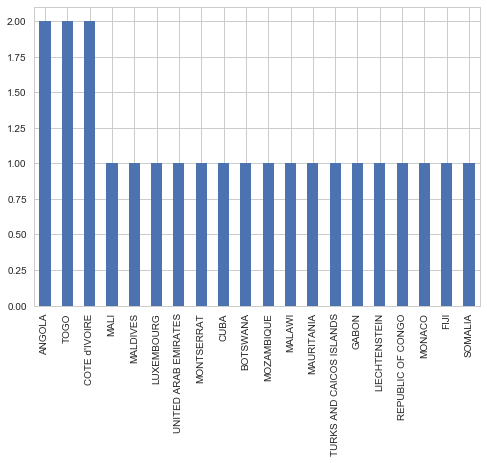

In [63]:
countrytail18 = country18.value_counts().tail(20)
countrytail18.plot.bar()
print(countrytail18)

CA    21186
NY     6920
NJ     6177
TX     5898
WA     5382
Name: EMPLOYER_STATE, dtype: int64


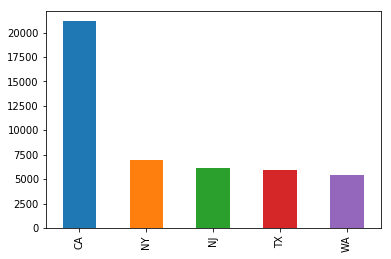

In [113]:
statehead18 = state18.value_counts().head()
statehead18.plot.bar()
print(statehead18)

MP    17
PR    16
AK    13
WY    12
VI     4
Name: EMPLOYER_STATE, dtype: int64


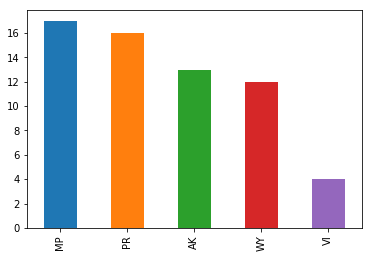

In [110]:
statetail18 = state18.value_counts().tail()
statetail18.plot.bar()
print(statetail18)

Custom Computer Programming Services                17914
Computer Systems Design Services                     5059
Electronic Shopping                                  3429
Software Publishers                                  3075
Colleges, Universities, and Professional Schools     3040
Name: NAICS_US_TITLE, dtype: int64


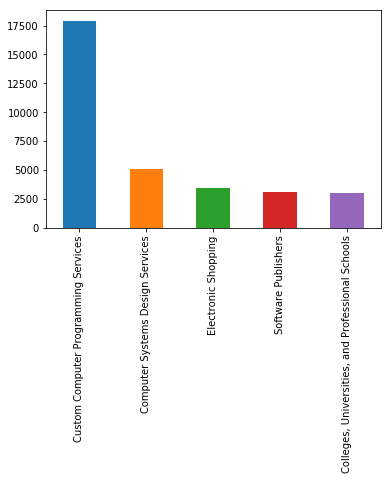

In [114]:
industryhead18 = industry18.value_counts().head()
industryhead18.plot.bar()
print(industryhead18)

Support Activities for Printing                         1
Carpet and Rug Mills                                    1
Manufactured Home (Mobile Home) Manufacturing           1
Cutlery and Flatware (except Precious) Manufacturing    1
Beet Sugar Manufacturing                                1
Name: NAICS_US_TITLE, dtype: int64


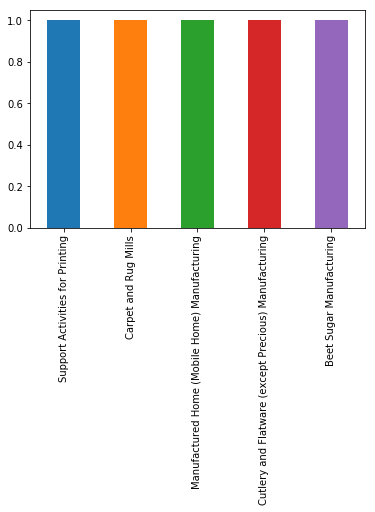

In [115]:
industrytail18 = industry18.value_counts().tail()
industrytail18.plot.bar()
print(industrytail18)

Master's      40280
Bachelor's    29066
Doctorate      4082
Other          2941
None            548
Name: FOREIGN_WORKER_INFO_EDUCATION, dtype: int64


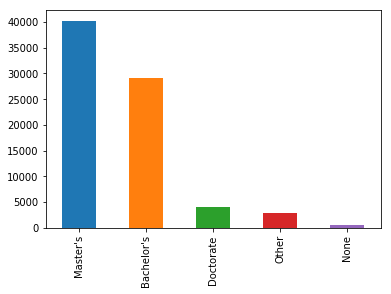

In [117]:
educationhead18 = education18.value_counts().head()
educationhead18.plot.bar()
print(educationhead18)

## Objective 2
** A quick look at the past 3 years of H-1B visa applications to view patterns **

** Looks at the most and least popular options for applicant country of citizenship (country18), state they're working in in the US (state18), and industry they work in (industry18) and the most popular levels of education (education18) **

** 2017 ** 


In [13]:
h1b_array=['H-1B','H-1B1','E-3']
year17['Response']=np.where(year17['CASE_STATUS']!='Denied', int('1'), int('0'))
h1b17=year17.loc[year17['CLASS_OF_ADMISSION'].isin(h1b_array)]
clean17= h1b17.loc[h1b17["CASE_STATUS"]!="Withdrawn"]
country17 = clean17["COUNTRY_OF_CITIZENSHIP"]
state17 = clean17["EMPLOYER_STATE"]
industry17 = clean17["NAICS_US_TITLE"]
education17 = clean17["FOREIGN_WORKER_INFO_EDUCATION"]

Text(0.5,1,'% of Visa Applicants')

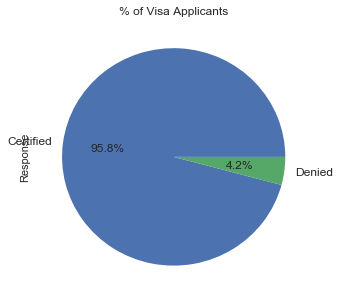

In [14]:
ax = (h1b17['Response'].value_counts()*100.0 /len(h1b17)).plot.pie(autopct='%.1f%%', labels = ['Certified','Denied'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_title('% of Visa Applicants', fontsize = 12)

INDIA          44741
CHINA           6113
CANADA          1669
SOUTH KOREA     1159
PHILIPPINES      823
Name: COUNTRY_OF_CITIZENSHIP, dtype: int64


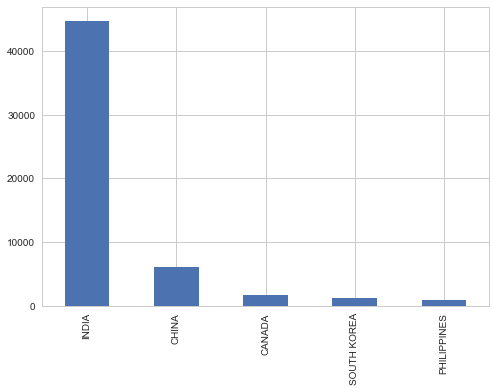

In [146]:
countryhead17 = country17.value_counts().head()
countryhead17.plot.bar()
print(countryhead17)

LIBERIA       1
ANDORRA       1
NAMIBIA       1
ST VINCENT    1
ANGOLA        1
Name: COUNTRY_OF_CITIZENSHIP, dtype: int64


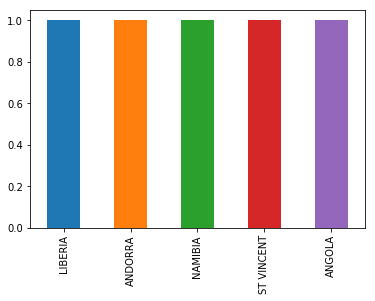

In [98]:
countrytail17 = country17.value_counts().tail()
countrytail17.plot.bar()
print(countrytail17)

CA    17031
TX     8951
NJ     5184
NY     4797
WA     3102
Name: EMPLOYER_STATE, dtype: int64


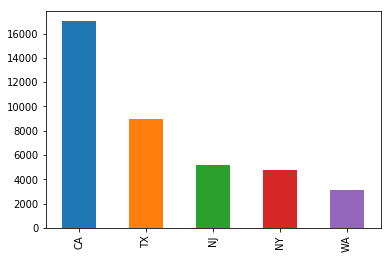

In [119]:
statehead17 = state17.value_counts().head()
statehead17.plot.bar()
print(statehead17)

WY    19
VI    18
MT    15
AK    13
BC     3
Name: EMPLOYER_STATE, dtype: int64


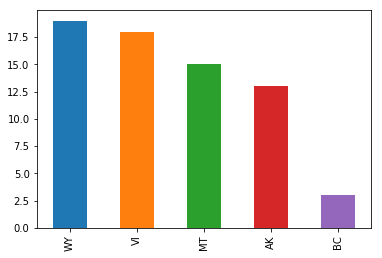

In [120]:
statetail17 = state17.value_counts().tail()
statetail17.plot.bar()
print(statetail17)

Custom Computer Programming Services                15209
Computer Systems Design Services                     8006
Software Publishers                                  2547
Colleges, Universities, and Professional Schools     2512
Other Computer Related Services                      2297
Name: NAICS_US_TITLE, dtype: int64


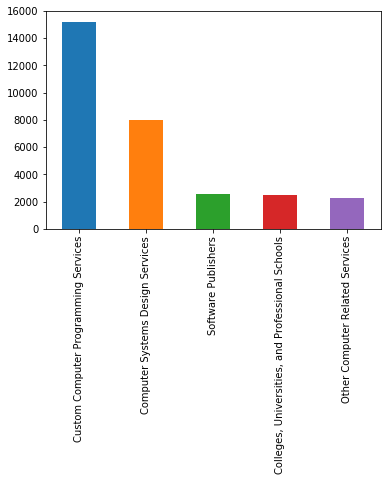

In [121]:
industryhead17 = industry17.value_counts().head()
industryhead17.plot.bar()
print(industryhead17)

Paging                                                                           1
Other Foundation, Structure, and Building Exterior Contractors                   1
Noncurrent-Carrying Wiring Device Manufacturing                                  1
Courts                                                                           1
Nonferrous Metal (except Copper and Aluminum) Rolling, Drawing, and Extruding    1
Name: NAICS_US_TITLE, dtype: int64


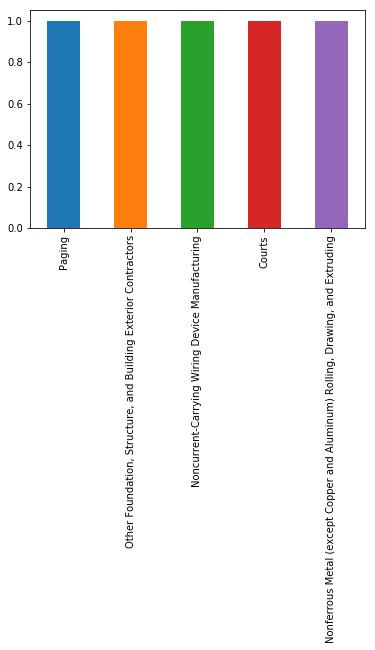

In [122]:
industrytail17 = industry17.value_counts().tail()
industrytail17.plot.bar()
print(industrytail17)

Master's      32177
Bachelor's    26211
Doctorate      3336
Other          2860
None            475
Name: FOREIGN_WORKER_INFO_EDUCATION, dtype: int64


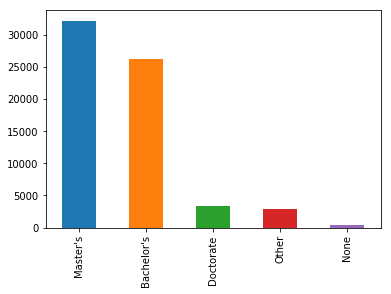

In [125]:
educationhead17 = education17.value_counts().head()
educationhead17.plot.bar()
print(educationhead17)

In [17]:
h1b_array=['H-1B','H-1B1','E-3']
year16['Response']=np.where(year16['CASE_STATUS']!='Denied', int('1'), int('0'))
h1b16=year16.loc[year16['CLASS_OF_ADMISSION'].isin(h1b_array)]
clean16= h1b16.loc[h1b16["CASE_STATUS"]!="Withdrawn"]
country16 = clean16["COUNTRY_OF_CITIZENSHIP"]
state16 = clean16["EMPLOYER_STATE"]
industry16 = clean16["NAICS_US_TITLE"]
education16 = clean16["FOREIGN_WORKER_INFO_EDUCATION"]

Text(0.5,1,'% of Visa Applicants')

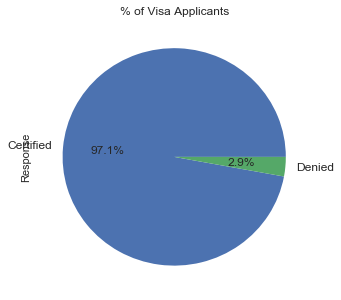

In [18]:
ax = (h1b16['Response'].value_counts()*100.0 /len(h1b16)).plot.pie(autopct='%.1f%%', labels = ['Certified','Denied'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_title('% of Visa Applicants', fontsize = 12)

INDIA          59218
CHINA           7330
CANADA          2464
SOUTH KOREA     1776
PHILIPPINES     1144
Name: COUNTRY_OF_CITIZENSHIP, dtype: int64


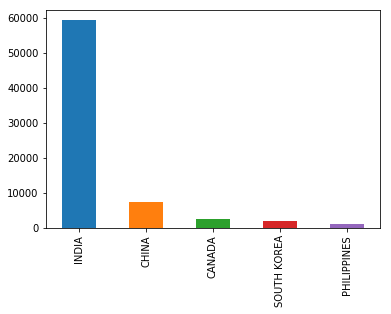

In [101]:
countryhead16 = country16.value_counts().head()
countryhead16.plot.bar()
print(countryhead16)

MAURITANIA    1
GUINEA        1
LAOS          1
LESOTHO       1
MALDIVES      1
Name: COUNTRY_OF_CITIZENSHIP, dtype: int64


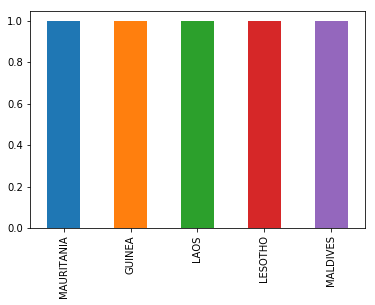

In [102]:
countrytail16 = country16.value_counts().tail()
countrytail16.plot.bar()
print(countrytail16)

CA    21993
TX    11040
NJ     8076
NY     6307
IL     4154
Name: EMPLOYER_STATE, dtype: int64


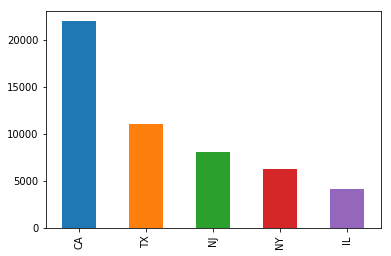

In [127]:
statehead16 = state16.value_counts().head()
statehead16.plot.bar()
print(statehead16)

AK    21
WY    19
MP    11
VI     5
BC     1
Name: EMPLOYER_STATE, dtype: int64


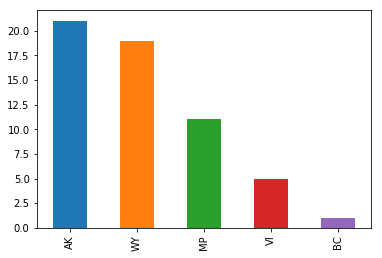

In [128]:
statetail16 = state16.value_counts().tail()
statetail16.plot.bar()
print(statetail16)

Custom Computer Programming Services                22218
Computer Systems Design Services                     9147
Software Publishers                                  3625
Colleges, Universities, and Professional Schools     3400
Other Computer Related Services                      2716
Name: NAICS_US_TITLE, dtype: int64


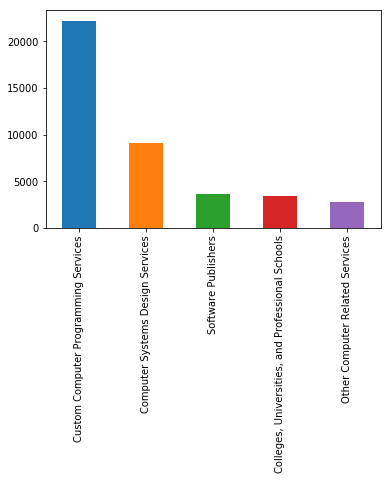

In [129]:
industryhead16 = industry16.value_counts().head()
industryhead16.plot.bar()
print(industryhead16)

Support Activities for Nonmetallic Minerals (except Fuels)    1
Sugar and Confectionery Product Manufacturing                 1
Mobile Food Services                                          1
Dual-Purpose Cattle Ranching and Farming                      1
Other Community Housing Services                              1
Name: NAICS_US_TITLE, dtype: int64


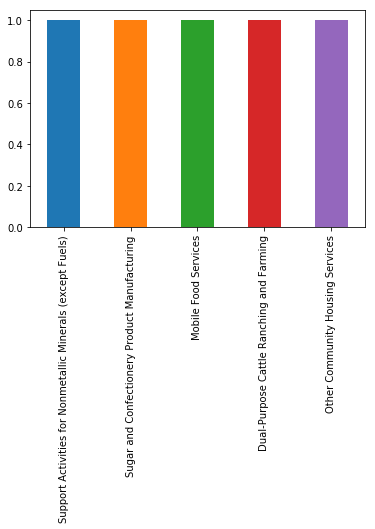

In [130]:
industrytail16 = industry16.value_counts().tail()
industrytail16.plot.bar()
print(industrytail16)

Master's      43215
Bachelor's    34721
Doctorate      4850
Other          3967
None            601
Name: FOREIGN_WORKER_INFO_EDUCATION, dtype: int64


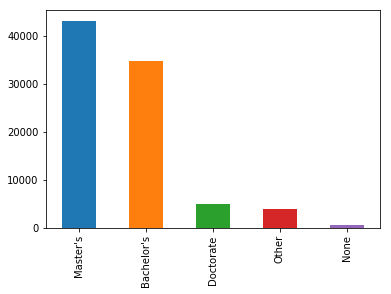

In [131]:
educationhead16 = education16.value_counts().head()
educationhead16.plot.bar()
print(educationhead16)

## Objective 3
** Test hypothesis of acceptance in relation to country of citizenship, job location, job industry, and education level (regression) **

In [22]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

import seaborn as sns
ax,figsize=(16,10)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#SMOTE algorithm
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [234]:
reg_clean18=clean18[["COUNTRY_OF_CITIZENSHIP",'EMPLOYER_STATE', 'NAICS_US_TITLE', "FOREIGN_WORKER_INFO_EDUCATION",'Response']]

In [235]:
reg_clean18

,COUNTRY_OF_CITIZENSHIP,EMPLOYER_STATE,NAICS_US_TITLE,FOREIGN_WORKER_INFO_EDUCATION,Response
12,INDIA,LA,"Colleges, Universities, and Professional Schools",Master's,1
14,INDIA,NY,Administrative Management and General Manageme...,Bachelor's,1
16,INDIA,CA,Other Computer Related Services,Bachelor's,1
18,CHINA,IN,"Colleges, Universities, and Professional Schools",Doctorate,1
19,INDIA,CA,Other Computer Related Services,Bachelor's,1
20,INDIA,CA,Semiconductor and Other Electronic Component M...,Master's,1
22,CHINA,PA,Pharmaceutical and Medicine Manufacturing,Master's,1
24,INDIA,WI,"Data Processing, Hosting, and Related Services",Master's,1
26,INDIA,IN,Other Computer Related Services,Bachelor's,1
30,INDIA,NC,Other Computer Related Services,Master's,1


In [236]:
cat_vars=['COUNTRY_OF_CITIZENSHIP','EMPLOYER_STATE','NAICS_US_TITLE','FOREIGN_WORKER_INFO_EDUCATION']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(reg_clean18[var], prefix=var)
    reg_clean18_1=reg_clean18.join(cat_list)
    reg_clean18=reg_clean18_1
    

cat_vars=['COUNTRY_OF_CITIZENSHIP','EMPLOYER_STATE','NAICS_US_TITLE','FOREIGN_WORKER_INFO_EDUCATION']
data_vars=reg_clean18.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [237]:
reg_clean18_final=reg_clean18[to_keep]
reg_clean18_final.columns.values

array(['Response', 'COUNTRY_OF_CITIZENSHIP_AFGHANISTAN',
       'COUNTRY_OF_CITIZENSHIP_ALBANIA', ...,
       "FOREIGN_WORKER_INFO_EDUCATION_Master's",
       'FOREIGN_WORKER_INFO_EDUCATION_None',
       'FOREIGN_WORKER_INFO_EDUCATION_Other'], dtype=object)

In [238]:
X = reg_clean18_final.loc[:, clean18_final.columns != 'Response']
y = reg_clean18_final.loc[:, clean18_final.columns == 'Response']

In [20]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

NameError: name 'SMOTE' is not defined

In [19]:
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Response'])

NameError: name 'os' is not defined

In [261]:
#Recursive Feature Elimiation
reg_clean18_final_vars=reg_clean18_final.columns.values.tolist()
y=['Response']
X=[i for i in reg_clean18_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
LogisticRegression(solver='lbfgs')

[False False False False False False False False  True False False False
 False  True False False False False False False False False False False
  True False False False False False  True False False  True  True False
 False False False False False False False False False False  True False
 False False False False  True False False False  True False False False
 False False False False False False False  True False  True False  True
  True  True False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
  True False False False  True False False  True False False False False
  True]
[ 98  97  41  87  77  74   5  40   1  42  56  38  64   1  54  18  15  66
  69  71  75  33  76  85   1  13  59  43  60  29   1  84   6   1   1  25
 102  39  88  47  30  72  36  78  27  14   1  26  70  31  89  35   1  90
  93  53   1  10   7  37  21  63  68  22  1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [279]:
cols=['COUNTRY_OF_CITIZENSHIP_CHINA','COUNTRY_OF_CITIZENSHIP_HONG KONG','COUNTRY_OF_CITIZENSHIP_JAPAN','COUNTRY_OF_CITIZENSHIP_CHILE','COUNTRY_OF_CITIZENSHIP_FRANCE','COUNTRY_OF_CITIZENSHIP_ARGENTINA','COUNTRY_OF_CITIZENSHIP_BRAZIL','COUNTRY_OF_CITIZENSHIP_GERMANY','COUNTRY_OF_CITIZENSHIP_ISRAEL','COUNTRY_OF_CITIZENSHIP_INDIA','COUNTRY_OF_CITIZENSHIP_AUSTRALIA','COUNTRY_OF_CITIZENSHIP_BANGLADESH']
X=os_data_X[cols]
y=os_data_y['Response']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: inf
         Iterations: 35
                                                Results: Logit
Model:                               Logit                            No. Iterations:                   35.0000
Dependent Variable:                  Response                         Pseudo R-squared:                 -inf   
Date:                                2018-12-21 03:42                 AIC:                              inf    
No. Observations:                    107938                           BIC:                              inf    
Df Model:                            11                               Log-Likelihood:                   -inf   
Df Residuals:                        107926                           LL-Null:                          -74817.
Converged:                           0.0000                           Scale:                            1.0000 
--------------------------------------------------------------------------------------------

/Users/clarissepinel/anaconda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/clarissepinel/anaconda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/clarissepinel/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## Objective 4
** Prediction modelling for whether an application will be accepted or rejected **

In [280]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [281]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [282]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[13347  2734]
 [    0 16301]]


There were 13347+16301=19648 correct predictions and 2734 incorrect predictions. 

In [283]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     16081
           1       0.86      1.00      0.92     16301

   micro avg       0.92      0.92      0.92     32382
   macro avg       0.93      0.91      0.91     32382
weighted avg       0.93      0.92      0.91     32382

